<a href="https://colab.research.google.com/github/Highping7/AI_github/blob/main/AIText_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from openpyxl import Workbook
import pandas as pd
from bs4 import BeautifulSoup
import warnings 
warnings.filterwarnings('ignore')

In [ ]:

driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()
a=input("유튜브명 : ")
url = "https://www.youtube.com/results?search_query={}".format(a)
driver.get(url)
driver.implicitly_wait(3)
time.sleep(2) 
driver.refresh()
element = driver.find_element(By.ID, "text") 
element.click()
element = driver.find_element(By.LINK_TEXT, "동영상")
element.click()
time.sleep(3) 
last_height = driver.execute_script("return document.documentElement.scrollHeight")
num_scrolls = 4  
url_list = [] 

for i in range(num_scrolls): 
    #처음부터 끝까지 스크롤을 내려 해당내용 크롤링
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight)")
    time.sleep(1.5)
    # 스크롤을 내렸을 때 더 이상 내용이 없을 때
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    if new_height == last_height: 
        break
    
    html_source = driver.page_source  
    soup = BeautifulSoup(html_source, "html.parser")

# 동영상의 url이 포함된 요소를 찾기 
parent_elements = soup.find_all(class_ = 'yt-simple-endpoint style-scope ytd-playlist-thumbnail')
# 동영상의 요소의 href값을 추출해 저장하기
for parent_element in parent_elements:
    url = parent_element['href']
    url_list.append('https://www.youtube.com' + url)

# 저장된 url 리스트를 프린트 하시오
url_list=list(set(url_list))
print(url_list)

#유료 가입 광고 무시하기
try:
    driver.find_element_by_css_selector("#dismiss-button > a").click()
except:
    pass

유튜브명 : 애플코딩
['https://www.youtube.com/watch?v=yYtTZcjCj_o', 'https://www.youtube.com/watch?v=RtvSgptpfnY', 'https://www.youtube.com/watch?v=0BbF7UxKKvg', 'https://www.youtube.com/watch?v=huvyxjwuBEQ', 'https://www.youtube.com/watch?v=qHzSQrLjxlQ', 'https://www.youtube.com/watch?v=yDhMmmHZONM', 'https://www.youtube.com/watch?v=uab4P-0Gpzk', 'https://www.youtube.com/watch?v=5BRFGMs1v_o', 'https://www.youtube.com/watch?v=00yJy7W0DQE&list=PLfLgtT94nNq0qTRunX9OEmUzQv4lI4pnP', 'https://www.youtube.com/watch?v=-GsrYvZoAdA', 'https://www.youtube.com/watch?v=G0psQ54f5zE', 'https://www.youtube.com/watch?v=o0spBNs0zRk', 'https://www.youtube.com/watch?v=LDvnLm2illk', 'https://www.youtube.com/watch?v=FqnAFX9lQPQ', 'https://www.youtube.com/watch?v=eYf-DG16yrU', 'https://www.youtube.com/watch?v=Y1Q4-GxIUHc', 'https://www.youtube.com/watch?v=SdDs0ScOFSU', 'https://www.youtube.com/watch?v=2oqix9x_bGw', 'https://www.youtube.com/watch?v=k2GWnDb5zoQ', 'https://www.youtube.com/watch?v=LmGB0uUnkR8', 'https:

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")

urls=url_list[0:2]
id =[]
comment=[]

for url in urls:
    driver.get(url)
    driver.implicitly_wait(3)

    time.sleep(3)

    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1.5)

        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    time.sleep(1.5)

    try:
        driver.find_element_by_css_selector("#dismiss-button > a").click()
    except:
            pass
        
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    id_list = soup.select("div#header-author > h3 > #author-text > span")
    comment_list = soup.select("yt-formatted-string#content-text")
    for i, j in zip(id_list,comment_list):
        id.append(i)
        comment.append(j)

In [ ]:
comment

[<yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input=""><a class="yt-simple-endpoint style-scope yt-formatted-string" dir="auto" href="/watch?v=yYtTZcjCj_o&amp;t=569s" spellcheck="false">9:29</a><span class="style-scope yt-formatted-string" dir="auto"> Latte is horse..</span><span class="style-scope yt-formatted-string" dir="auto">
 </span><span class="style-scope yt-formatted-string" dir="auto">코딩 너무 재밌고 쉽게 가르쳐주셔서 그냥 홀린 듯 따라해보는 중</span></yt-formatted-string>,
 <yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input="">감칠맛 나는 강의!!!  강사님 정말 최고입니다.</yt-formatted-string>,
 <yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input=""><a class="yt-simple-endpoint style-scope yt-formatted-string" dir="auto" href="/watch?v=yYtTZcjCj_o&amp;t=80s" spellcheck="false">1:20</a><span class="style-scope yt

In [ ]:
id_final = []
comment_final = []

for i in range(len(id)):
    temp_id = id[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace('    ', '')
    id_final.append(temp_id) # 댓글 작성자

    temp_comment = comment[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace('    ', '')
    comment_final.append(temp_comment) # 댓글 내용

In [ ]:
comment_final

['9:29 Latte is horse..코딩 너무 재밌고 쉽게 가르쳐주셔서 그냥 홀린 듯 따라해보는 중',
 '감칠맛 나는 강의!!!  강사님 정말 최고입니다.',
 '1:20 상품마다 이미지를 넣어야하는데 동적으로 생성했기 때문에 apple.jpg 를 넣으면 모든 사진이 다 apple 사진으로 나오는데 상품마다 사진을 다르게 하려면 어떻게 해야하나요?',
 '당근마켓 게시물은 스크롤할 수록 게시물이 많이지는데 그건 어떻게 구현하나요?',
 '첨 보는데 말이 귀에 쏙 들어와서 좋아요 ㅎㅎ 열심히 공부해서 앱 개발 목표!!',
 '스승님 파이어베이스 수강하고 있는 학생입니다. 질문이 있어 댓글 드립니다.let test = "html덩어리 (댓글에 안 적히네요ㅠㅠ)";$(\'.container\').append(test);이 부분 있지 않습니까? 이거 순수 JS로 해보려는데 도무지 안되어 글을남깁니다.바꾸면 어떻게 될까요...?',
 '재미있어요.ㅎㅎ 중간중간 조크도,,ㅎㅎㅎ',
 '그저 빛..',
 '감사하빈다.',
 '와씨너무재밌다..',
 '말투에 빠져들어요..........',
 '님좀 쩌는듯',
 '리액트 혼자 도전해보고 수많은 의존성라이브러리 복잡한 용어와 코딩스타일때문에 비선호 하게 되었는데 오늘 알려주신 내용이 매우 흥미롭네요, 요새 거의 모든 앱이 GUI 를 웹이나 모바일로 서비스하니까 어쩔수 없이 웹개발 보고 있는데 리액트 안써도 웹앱 만들수 있다니 저는 이쪽으로 파봐야겠습니다 ㅋㅋ',
 '리액트 억빠는 잘못됨, 필요에 따라 효율적인 라이브러리를 선택하는게 현명한 개발자의 덕목임',
 '리액트를 적용하기 어려운 환경에서 소극적으로라도 컴포넌트 기능을 활용하기 위해 써본 적은 있는데 불편하고 제약이 많더라구요. 결국은 상황에 맞게 필요한 라이브러리를 선택하는게 가장 중요해 보입니다. 10년 뒤에도 전 리액트와 같은 라이브러리들을 계속 쓸 거 같네요',
 '정확히 하자면 깃헙은 루비로 웹컴포넌트를 작성가능한 Viewcomponet 프레임워크를 만들

In [ ]:
# 저장된 내용을 아이디, 댓글 내용를 가지도록 dict으로 저장
pd_data = {"아이디" : id_final, "댓글 내용" : comment_final}

# 데이터 프레임으로 변환
youtube_pd = pd.DataFrame(pd_data)

# 데이터를 xlsx로 저장 index=False 데이터의 순서 번호 제거
youtube_pd.to_excel("yo2.xlsx", index=False)
df = pd.read_excel("yo2.xlsx")
df.to_csv("yo2.csv ", index=False, encoding="utf-8-sig")

In [ ]:
youtube_pd

,아이디,댓글 내용
0,조승현,9:29 Latte is horse..코딩 너무 재밌고 쉽게 가르쳐주셔서 그냥 홀린...
1,Pro Yun,감칠맛 나는 강의!!! 강사님 정말 최고입니다.
2,oo11 12,1:20 상품마다 이미지를 넣어야하는데 동적으로 생성했기 때문에 apple.jpg ...
3,asdf 1234,당근마켓 게시물은 스크롤할 수록 게시물이 많이지는데 그건 어떻게 구현하나요?
4,샤,첨 보는데 말이 귀에 쏙 들어와서 좋아요 ㅎㅎ 열심히 공부해서 앱 개발 목표!!
...,...,...
71,Newkini,아그냥 스벨트쓸래 어려워
72,Andrew,깃헙 바닐라로...버그랑 코드 관리 어쩌려고..어디서 바닐라로 유투부 만드는 소리를..
73,신규게임찍먹단,왜자꾸 vue가 떠오르지 ㅎㅅㅎ
74,아침해쌀,바닐라 js 로도 리액트 역할을 일부 대체 할 수 있다는건 알겠습니다만... 프레임...


In [ ]:
df["아이디"]

0             조승현
1         Pro Yun
2         oo11 12
3       asdf 1234
4               샤
         ...     
71        Newkini
72         Andrew
73        신규게임찍먹단
74           아침해쌀
75          페트로무황
Name: 아이디, Length: 76, dtype: object

In [ ]:
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if 'Nanum' in f.name:
        print(f.name, f.fname)

In [ ]:
# 폰트 경로 설정
font_path = 'C:/Users/JHPC/AppData/Local/Microsoft/Windows/Fonts/NanumSquareL.ttf'

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("ㅋㅋ")
stopwords.add("ㅎㅎ")
stopwords.add("너무")
stopwords.add("진짜")
stopwords.add("와")

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
with open("stopwords.txt", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# CSV 파일을 pandas 데이터프레임으로 읽어옴
#df = pd.read_csv('파일이름.csv',encoding='utf-8')

# 댓글 내용이 저장된 컬럼 선택
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

# 모든 댓글 내용을 하나의 문자열로 결합
text = ' '.join(new_list)

In [ ]:
text

'9:29 Latte is horse..코딩 너무 재밌고 쉽게 가르쳐주셔서 그냥 홀린 듯 따라해보는 중 감칠맛 나는 강의!!!  강사님 정말 최고입니다. 1:20 상품마다 이미지를 넣어야하는데 동적으로 생성했기 때문에 apple.jpg 를 넣으면 모든 사진이 다 apple 사진으로 나오는데 상품마다 사진을 다르게 하려면 어떻게 해야하나요? 당근마켓 게시물은 스크롤할 수록 게시물이 많이지는데 그건 어떻게 구현하나요? 첨 보는데 말이 귀에 쏙 들어와서 좋아요 ㅎㅎ 열심히 공부해서 앱 개발 목표!! 스승님 파이어베이스 수강하고 있는 학생입니다. 질문이 있어 댓글 드립니다.let test = "html덩어리 (댓글에 안 적히네요ㅠㅠ)";$(\'.container\').append(test);이 부분 있지 않습니까? 이거 순수 JS로 해보려는데 도무지 안되어 글을남깁니다.바꾸면 어떻게 될까요...? 재미있어요.ㅎㅎ 중간중간 조크도,,ㅎㅎㅎ 그저 빛.. 감사하빈다. 와씨너무재밌다.. 말투에 빠져들어요.......... 님좀 쩌는듯 리액트 혼자 도전해보고 수많은 의존성라이브러리 복잡한 용어와 코딩스타일때문에 비선호 하게 되었는데 오늘 알려주신 내용이 매우 흥미롭네요, 요새 거의 모든 앱이 GUI 를 웹이나 모바일로 서비스하니까 어쩔수 없이 웹개발 보고 있는데 리액트 안써도 웹앱 만들수 있다니 저는 이쪽으로 파봐야겠습니다 ㅋㅋ 리액트 억빠는 잘못됨, 필요에 따라 효율적인 라이브러리를 선택하는게 현명한 개발자의 덕목임 리액트를 적용하기 어려운 환경에서 소극적으로라도 컴포넌트 기능을 활용하기 위해 써본 적은 있는데 불편하고 제약이 많더라구요. 결국은 상황에 맞게 필요한 라이브러리를 선택하는게 가장 중요해 보입니다. 10년 뒤에도 전 리액트와 같은 라이브러리들을 계속 쓸 거 같네요 정확히 하자면 깃헙은 루비로 웹컴포넌트를 작성가능한 Viewcomponet 프레임워크를 만들고 그걸 루비온레일즈와 사용합니다. 깃헙은 JS 단독 SPA를 만드는게 아니니 괜찮은 선택이라 보여집니다 리액

In [ ]:
# HSV 색상으로 마스킹 (hsv_color_mask.py)
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("mtest2.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])
white1 = np.array([0,0,150])
white2 = np.array([180,50,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)
mask_white = cv2.inRange(hsv, white1, white2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)
res_white = cv2.bitwise_and(img, img, mask=mask_white)

res_sum=cv2.bitwise_or(res_red,res_white)

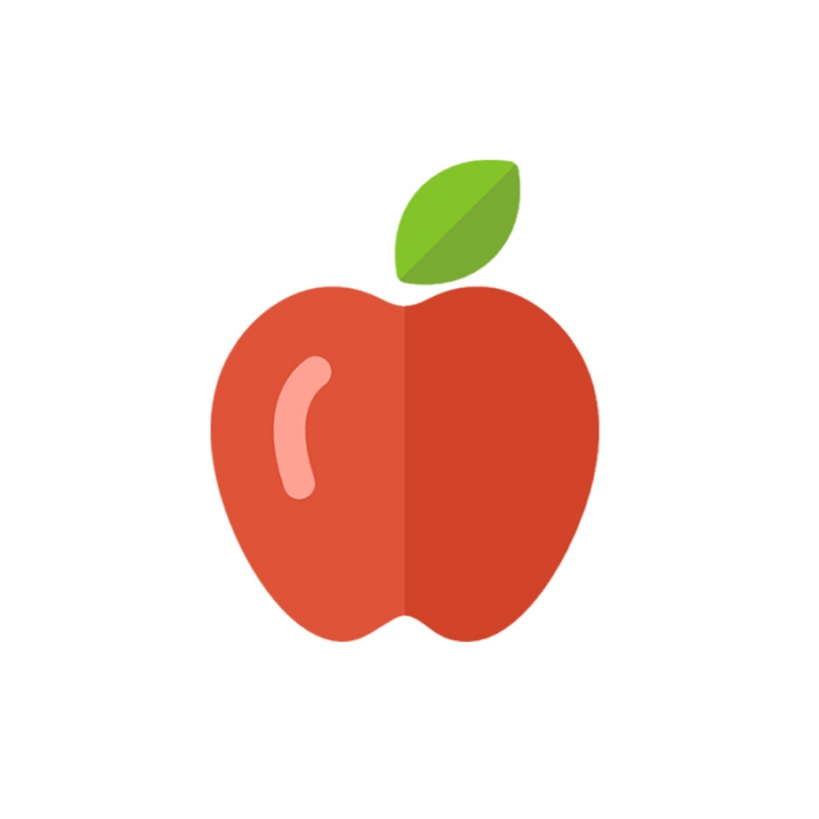

In [ ]:
from PIL import Image
from wordcloud import ImageColorGenerator
import numpy as np
mask_image = np.array(Image.open('capple.png'))

wordcloud = WordCloud(font_path=font_path,width=800, height=800,background_color='white',
                      stopwords=stopwords, min_word_length=4).generate(text)

wordcloud_image = WordCloud(font_path=font_path,background_color='black', stopwords=stopwords, 
                       min_word_length=4, mask=mask_image).generate(text)

wordcloud_color = WordCloud(font_path=font_path,background_color='black', stopwords=stopwords, 
                       min_word_length=4, mask=mask_image).generate(text)

image_colors = ImageColorGenerator(mask_image)
wordcloud_color.recolor(color_func=image_colors)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(mask_image, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

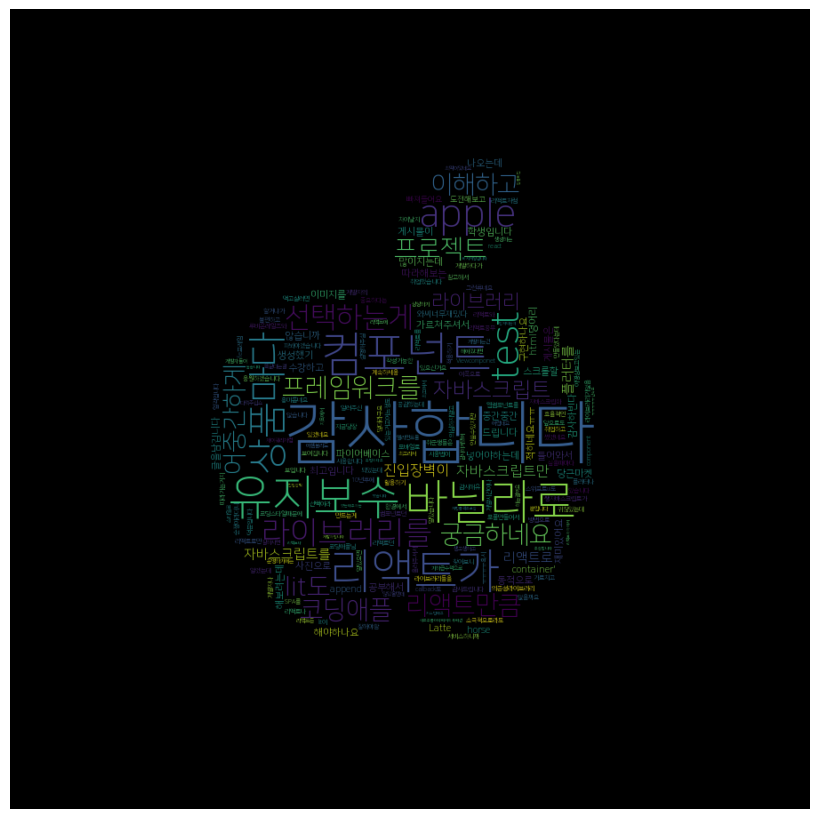

In [ ]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.axis('off')
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.tight_layout(pad=0)

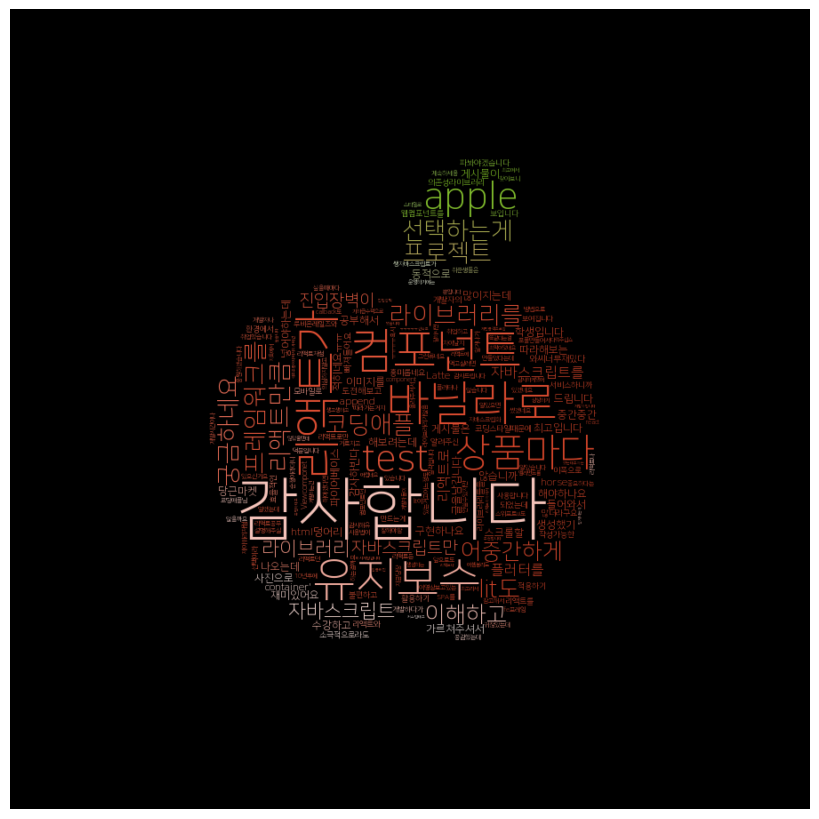

In [ ]:
#image_colors = ImageColorGenerator(mask_image)
#wordcloud_color.recolor(color_func=image_colors)

plt.figure(figsize=(8, 8), facecolor=None)
plt.axis('off')
plt.imshow(wordcloud_color, interpolation='bilinear')
plt.tight_layout(pad=0)

In [ ]:
mask_image

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[ 82,  63,  83, 255],
        [ 82,  63,  83, 255],
        [ 82,  63,  83, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[ 82,  63,  83, 255],
        [ 82,  63,  83, 255],
        [ 82,  63,  83, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[ 82

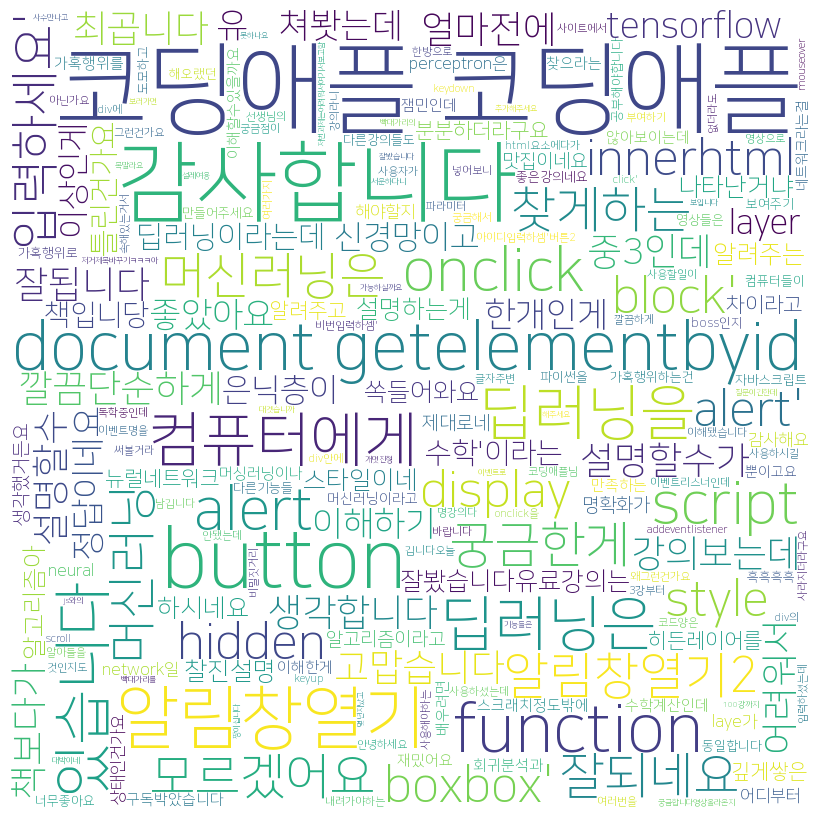

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=800,
                      background_color='white',stopwords=stopwords, min_word_length=4).generate(text)

# 단어의 빈도 계산
wordcloud.generate_from_frequencies(wordcloud.process_text(text.lower()))
word_freq = wordcloud.process_text(text.lower())

# 워드 클라우드 출력
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# 파일로 저장
plt.savefig('wordcloud.png')


In [ ]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("piano_test.png"))

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path, background_color="black", mask=mask, stopwords=stopwords, min_word_length=4).generate(text)

# 단어의 빈도 계산
wordcloud.generate_from_frequencies(wordcloud.process_text(text.lower()))
word_freq = wordcloud.process_text(text.lower())

wordcloud.to_file("wordcloud.png")
# 워드 클라우드 출력
#plt.figure(figsize=(8, 8), facecolor=None)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.tight_layout(pad=0)

# 파일로 저장
#plt.savefig('wordcloud.png')



In [ ]:
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [ ]:
##문제 정답

# 해당 숫자보다 낮은 빈도의 단어를 도출함
word_num = {}
for word, freq in word_freq.items():
    if freq < 3: # 해당 단어의 빈도수 보다 낮은 단어 도출
        word_num[word] = freq

# 낮은 빈도의 단어를 프린트함
for word, frequency in word_num.items():
    print(("{}: {}").format(word, frequency))

anything: 1
영상입니다: 1
번역자막: 2
jocasso: 2
codemafia: 2
caption: 2
조코딩과: 2
프로그래밍: 2
jocoding: 2
미리보기: 1
chatgpt: 2
해킹하는: 1
dan으로: 1
마이크로소프트에: 1
bing: 1
chat의: 1
프롬프트: 1
openai: 1
cto도: 1
anti: 1
dan이: 1
나온다면: 1
커스터마이징: 1
soojin: 2
bang님: 2
그림자그림자님: 2
파라소프트웨어님: 2
뚱뚜루_수수또님: 2
니나노닐리리야님: 2
이희진님: 2
dreamchaser님: 2
어디가니페르난도님: 2
정대연님: 2
jaegyu: 2
이서용님: 2
서동현님: 1
eungyu: 2
lazy: 2
zoey님: 2
이영은님: 2
david: 2
choi님: 2
james님: 2
차딩charming: 1
coding: 1
감사드립니다: 2
youtube: 2
channel: 2
ucqne2jmbasnybjgacubirrg: 2
join: 2
마이크로소프트: 1
it뉴스: 2
테크뉴스: 2
낄낄거리고: 1
거북한데: 1
잘듣는거: 1
잘봤습니다: 1
chatgpt가: 1
고쳐져야될게: 1
길어지면: 1
페이지로: 1
봐야되는데: 1
사용할때: 1
멍청한줄: 1
알았어요: 1
ㅋㅋㅋㅋㅋㅋㅋ: 1
프로그래머: 1
중국관련: 1
질문하는게: 1
ㄹㅇ꿀잼이더라: 1
벤먹기전이라: 1
중국공산당: 1
동북공정에대해: 1
한사바리해주는거: 1
시원하게: 1
볼수있음: 1
좋아하는: 1
ai끼리: 1
토론하면: 1
재밌겠다: 1
뚫으려는자와: 1
막으려는자가: 1
성장한다: 1
인공지능이: 1
무서운게: 1
인공지능에게: 2
가르치는: 1
무섭다는것: 1
그려주는: 1
미드저니도: 1
프롬프트에: 1
뽑아내기가: 1
상대적으로: 1
찢어지고ㅠㅜ: 1
인종차별도: 1
가스라이팅이라니: 1
생각하지도: 1
못했네ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ: 1
레딧이야: 1
재미잇는: 1
적대적으로: 1
생각하는: 1
모르겟네요: 1
생각하지

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    # 긍정적인 문장과 부정적인 문장을 학습 데이터로 생성합니다.
    positive_sentences = [" ".join(positive_words)] * len(positive_words)
    negative_sentences = [" ".join(negative_words)] * len(negative_words)

    # 학습 데이터와 레이블을 생성합니다.
    X = positive_sentences + negative_sentences
    y = [1] * len(positive_sentences) + [0] * len(negative_sentences)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b") 
    X = vectorizer.fit_transform(X)

    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [ ]:
import itertools
import numpy as np

pos_list = []
neg_list = []
positive_list=[]
negative_list=[]
pos_convert=[]
neg_convert=[]

def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    max_permutations = 20

    pos_per = list(itertools.islice(itertools.permutations(positive_words), max_permutations))
    neg_per = list(itertools.islice(itertools.permutations(negative_words), max_permutations))

    for p in positive_sentences:
        pos_list.append(list(p))

    for i in range(0,len(pos_list)):
        a=[" ".join(pos_list[i])]
        positive_list.append(a)

    for num in positive_list:
        pos_convert.append(num[0])
    
    for n in negative_sentences:
        neg_list.append(list(n))

    for i in range(0,len(neg_list)):
        a=[" ".join(neg_list[i])]
        negative_list.append(a)

    for num in negative_list:
        neg_convert.append(num[0])

    # 학습 데이터와 레이블을 생성합니다.
    X = pos_convert + neg_convert
    y = [1] * len(pos_convert) + [0] * len(neg_convert)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b")
    X = vectorizer.fit_transform(X)
    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [ ]:
def predict_sentiment_analysis(text, vectorizer, clf):
    # 입력된 텍스트를 벡터화합니다.
    X = vectorizer.transform([text])

    # 모델을 사용하여 감성을 예측합니다.
    y_pred = clf.predict(X)

    # 예측 결과에 따라 출력 메시지와 카운트 정보를 선택합니다.
    if y_pred[0] == 1:
        result = {"sentiment": "긍정적인 단어", "positive_count": 1, "negative_count": 0}
    else:
        result = {"sentiment": "부정적인 단어", "positive_count": 0, "negative_count": 1}

    # 입력된 텍스트에 포함된 긍정 단어와 부정 단어를 카운트합니다.
    for word in text.split():
        if word in positive_words:
            result["positive_count"] += 1
        elif word in negative_words:
            result["negative_count"] += 1

    return result

In [ ]:
with open('text/positive_words.txt', 'r',encoding='utf-8') as f:
    positive_words = f.read().splitlines()

with open('text/negative_words.txt', 'r',encoding='utf-8') as f:
    negative_words = f.read().splitlines()

In [ ]:
vectorizer, clf=train_sentiment_analysis_model("text/positive_words.txt","text/negative_words.txt")
text = input("분석할 문자열을 입력하세요: ")

predict_sentiment_analysis(text, vectorizer, clf)

In [ ]:
df = pd.read_csv("yo.csv", encoding='utf-8-sig')
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

In [ ]:
##문제 정답
emotion = []
for comment in new_list:
    prediction = predict_sentiment_analysis(comment, vectorizer, clf)
    emotion.append(prediction['sentiment'])

df["감정"]=pd.DataFrame(emotion)